# 2.1 为何选择PyTorch？

PyTorch由4个主要的包组成：


* torch：类似于Numpy的通用数组库，可将张量类型转换为torch.cuda.TensorFloat，并在GPU上进行计算。

* torch.autograd：用于构建计算图形并自动获取梯度的包。

* torch.nn：具有共享层和损失函数的神经网络库。

* torch.optim：具有通用优化算法（如SGD、Adam等）的优化包

# 2.2 安装

In [1]:
# 验证torch安装是否成功

import torch
torch.__version__

'1.7.1'

In [4]:
# 测试是否在使用GPU
# 测试 CUDA

print("Support CUDA ?: ", torch.cuda.is_available())
x = torch.tensor([10.0])
x = x.cuda()
print(x)

y = torch.randn(2, 3)
y = y.cuda()
print(y)

z = x + y
print(z)

# 测试 CUDNN
from torch.backends import cudnn

print("Support cudnn ?: ",cudnn.is_acceptable(x))

Support CUDA ?:  True
tensor([10.], device='cuda:0')
tensor([[ 2.3097,  0.7396,  0.4830],
        [ 0.6227, -0.9433,  0.2236]], device='cuda:0')
tensor([[12.3097, 10.7396, 10.4830],
        [10.6227,  9.0567, 10.2236]], device='cuda:0')
Support cudnn ?:  True


# 2.3 Jupyter Notebook环境配置

# 2.4 Numpy与Tensor

* 最大的区别就是Numpy会把ndarray放在CPU中进行加速运算，而由Torch产生的Tensor会放在GPU中进行加速运算（假设当前环境有GPU）

## 2.4.1 Tensor概述

In [6]:
# 不修改自身 eg:

x = torch.tensor([1,2])
y = torch.tensor([3,4])
z = x.add(y)  # 不带下滑符，不修改数据本身
print(z)
print(x)
x.add_(y)  # 带下滑符，修改数据本身
print(x)

tensor([4, 6])
tensor([1, 2])
tensor([4, 6])


## 2.4.2 创建Tensor

In [7]:
# eg:

# 根据list数据生成Tensor
torch.Tensor([1,2,3,4,5,6])

# 根据指定形状生成Tensor
torch.Tensor(2,3)

# 根据给定的Tensor的形状
t = torch.Tensor([[1,2,3],[4,5,6]])

#查看Tensor的形状
print(t.size())

#shape与size()等价方式
print(t.shape)

#根据已有形状创建Tensor
print(torch.Tensor(t.size()))

torch.Size([2, 3])
torch.Size([2, 3])
tensor([[-5.2810e-24,  4.5629e-41,  9.0200e-28],
        [ 3.0932e-41,  4.4842e-44,  0.0000e+00]])


In [8]:
# 注意torch.Tensor与torch.tensor的几点区别：

t1 = torch.Tensor(1)
t2 = torch.tensor(1)
print("t1的值{},t1的数据类型{}".format(t1,t1.type()))
print("t2的值{},t2的数据类型{}".format(t2,t2.type()))

t1的值tensor([-5.2810e-24]),t1的数据类型torch.FloatTensor
t2的值1,t2的数据类型torch.LongTensor


In [9]:
# eg:

# 生成一个单位矩阵
torch.eye(2,2)

# 自动生成全是0的矩阵
torch.zeros(2,3)

# 根据规则生成数据
torch.linspace(1,10,4)

# 生成满足均匀分布随机数
torch.rand(2,3)

# 生成满足标准分布随机数
torch.randn(2,3)

# 返回所给数据形状相同，值全为0的张量
torch.zeros_like(torch.rand(2,3))

tensor([[0., 0., 0.],
        [0., 0., 0.]])

## 2.4.3 修改Tensor形状

In [1]:
import torch

# 生成一个形状为2x3的矩阵
x = torch.randn(2, 3)

# 查看矩阵的形状
print(x)
print(x.size())
print(x.dim())

# 把x变为3x2的矩阵
print(x.view(3,2))

# 把x展平为1维向量
y=x.view(-1)
print(y)
print("y.shape: ", y.shape)

# 添加一个维度
z=torch.unsqueeze(y,0)

# 查看z的形状
print(z)
print(z.size())
# 计算Z的元素个数
print(z.numel())

tensor([[ 1.5971, -0.3620, -0.0353],
        [-1.8480,  1.4629,  0.2418]])
torch.Size([2, 3])
2
tensor([[ 1.5971, -0.3620],
        [-0.0353, -1.8480],
        [ 1.4629,  0.2418]])
tensor([ 1.5971, -0.3620, -0.0353, -1.8480,  1.4629,  0.2418])
y.shape:  torch.Size([6])
tensor([[ 1.5971, -0.3620, -0.0353, -1.8480,  1.4629,  0.2418]])
torch.Size([1, 6])
6


## 2.4.4 索引操作

In [21]:
torch.manual_seed(100)

x = torch.randn(2, 3)
print(x)
print(x[0,:])
print(x[:,-1])

mask = x>0
print(torch.masked_select(x, mask)) # 获取值
print(torch.nonzero(mask)) # 下标

index = torch.LongTensor([[1,0,0]])

print(torch.gather(x,0,index)) # 在指定维度上选择数据 ?
index = torch.LongTensor([[1,1,1],[1,1,1]])
print(torch.gather(x,1,index))


tensor([[ 0.3607, -0.2859, -0.3938],
        [ 0.2429, -1.3833, -2.3134]])
tensor([ 0.3607, -0.2859, -0.3938])
tensor([-0.3938, -2.3134])
tensor([0.3607, 0.2429])
tensor([[0, 0],
        [1, 0]])
tensor([[ 0.2429, -0.2859, -0.3938]])
tensor([[-0.2859, -0.2859, -0.2859],
        [-1.3833, -1.3833, -1.3833]])


## 2.4.5 广播机制

In [25]:
import numpy as np

A = np.arange(0,40,10).reshape(4,1)
print(A)

B = np.arange(0,3)
print(B)

A1 = torch.from_numpy(A)  # 把数组转换成张量，且二者共享内存
B1 = torch.from_numpy(B)

print(f"结果：{A1 + B1}")

print(A1.shape)
print(B1.shape)

B2 = B1.unsqueeze(0)
print(B2.shape)

A2 = A1.expand(4,3)
B3 = B2.expand(4,3)

print(f"结果：{A2 + B3}")

[[ 0]
 [10]
 [20]
 [30]]
[0 1 2]
结果：tensor([[ 0,  1,  2],
        [10, 11, 12],
        [20, 21, 22],
        [30, 31, 32]])
torch.Size([4, 1])
torch.Size([3])
torch.Size([1, 3])
结果：tensor([[ 0,  1,  2],
        [10, 11, 12],
        [20, 21, 22],
        [30, 31, 32]])


## 2.4.6 逐元素操作

In [26]:
# eg

t = torch.randn(1,3)
t1 = torch.randn(3,1)
t2 = torch.randn(1,3)

print(torch.addcdiv(t,0.1,t1,t2))
print(torch.sigmoid(t))
print(torch.clamp(t,0,1))
print(t.add_(2))

tensor([[-0.3055, -0.8318,  1.7063],
        [-0.2760, -0.7448,  1.6001],
        [-0.3374, -0.9256,  1.8209]])
tensor([[0.4214, 0.2961, 0.8517]])
tensor([[0., 0., 1.]])
tensor([[1.6828, 1.1340, 3.7482]])


/home/xieyipeng/anaconda3/envs/torch/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: This overload of addcdiv is deprecated:
	addcdiv(Tensor input, Number value, Tensor tensor1, Tensor tensor2, *, Tensor out)
Consider using one of the following signatures instead:
	addcdiv(Tensor input, Tensor tensor1, Tensor tensor2, *, Number value, Tensor out) (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370193460/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  import sys


In [29]:
# 归并操作

a=torch.linspace(0,10,6)
print(a)

a=a.view((2,3))
print(a)

b=a.sum(dim=0)
print(b)

b=a.sum(dim=0,keepdim=True) #b的形状为[1,3]
print(b)

tensor([ 0.,  2.,  4.,  6.,  8., 10.])
tensor([[ 0.,  2.,  4.],
        [ 6.,  8., 10.]])
tensor([ 6., 10., 14.])
tensor([[ 6., 10., 14.]])


## 2.4.8 比较操作

In [34]:
import torch
x=torch.linspace(0,10,6).view(2,3)
print(x)
#求所有元素的最大值
print(torch.max(x)) #结果为10
#求y轴方向的最大值
print(torch.max(x,dim=0)) #结果为[6,8,10]
#求最大的2个元素
torch.topk(x,1,dim=0) #结果为[6,8,10],对应索引为tensor([[1, 1, 1]

tensor([[ 0.,  2.,  4.],
        [ 6.,  8., 10.]])
tensor(10.)
torch.return_types.max(
values=tensor([ 6.,  8., 10.]),
indices=tensor([1, 1, 1]))


torch.return_types.topk(
values=tensor([[ 6.,  8., 10.]]),
indices=tensor([[1, 1, 1]]))

## 2.4.9 矩阵操作

In [37]:
a=torch.tensor([2, 3])
b=torch.tensor([3, 4])
print(torch.dot(a,b)) # 内积，运行结果为18

x=torch.randint(10,(2,3))
y=torch.randint(6,(3,4))
print(torch.mm(x,y))

x=torch.randint(10,(2,2,3))
y=torch.randint(6,(2,3,4))
torch.bmm(x,y)

tensor(18)
tensor([[14,  0,  8, 23],
        [26,  0, 10, 40]])


tensor([[[22, 31, 38, 33],
         [12, 16, 18, 28]],

        [[18, 22, 27, 41],
         [39, 30, 45, 75]]])

# 2.5 Tensor与Autograd

* torch.autograd包就是用来自动求导的

## 2.5.1 自动求导要点

## 2.5.2 计算图

## 2.5.3 标量反向传播

* z = y + b

* y = wx

In [58]:
import torch

x = torch.Tensor([2])
w = torch.randn(1,requires_grad=True)
b = torch.randn(1,requires_grad=True)

y = torch.mul(w, x)
z = torch.add(y, b)

print(f"x:{x},w:{w},b:{b}\nz:{z}")


print("x,w,b的require_grad属性分别为:{},{},{}".format(x.requires_grad,w.requires_grad,b.requires_grad))

x:tensor([2.]),w:tensor([0.0161], requires_grad=True),b:tensor([1.9956], requires_grad=True)
z:tensor([2.0278], grad_fn=<AddBackward0>)
x,w,b的require_grad属性分别为:False,True,True


In [59]:
# 查看叶子节点、非叶子节点的其他属性。
#查看非叶子节点的requres_grad属性,
print("y,z的requires_grad属性分别为:{},{}".format(y.requires_grad,z.requires_grad))
#因与w,b有依赖关系,故y,z的requires_grad属性也是:True,True
#查看各节点是否为叶子节点
print("x,w,b,y,z的是否为叶子节点:{},{},{},{},{}".format(x.is_leaf,w.is_leaf,b.is_leaf,y.is_leaf,z.is_leaf))
#x,w,b,y,z的是否为叶子节点:True,True,True,False,False
#查看叶子节点的grad_fn属性
print("x,w,b的grad_fn属性:{},{},{}".format(x.grad_fn,w.grad_fn,b.grad_fn))
#因x,w,b为用户创建的,为通过其他张量计算得到,故x,w,b的grad_fn属性:None,None,None
#查看非叶子节点的grad_fn属性
                                                
print("y,z的是否为叶子节点:{},{}".format(y.grad_fn,z.grad_fn))
#y,z的是否为叶子节点:<MulBackward0 object at 0x7f923e85dda0>,<AddBackward0 object at 0x7f923e85d9b0>


y,z的requires_grad属性分别为:True,True
x,w,b,y,z的是否为叶子节点:True,True,True,False,False
x,w,b的grad_fn属性:None,None,None
y,z的是否为叶子节点:<MulBackward0 object at 0x7fc7d5a8c630>,<AddBackward0 object at 0x7fc7d5a8c978>


In [60]:
# 自动求导,实现梯度方向传播,即梯度的反向传播。

z.backward()

print(f"参数w,b,x的梯度分别为:{w.grad},{b.grad},{x.grad}")
print(f"非叶子节点y,z的梯度分别为:{y.grad},{y.grad}")

参数w,b,x的梯度分别为:tensor([2.]),tensor([1.]),None
非叶子节点y,z的梯度分别为:None,None


/home/xieyipeng/anaconda3/envs/torch/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  


## 2.5.4 非标量反向传播

In [61]:
# 定义叶子节点及计算节点。

x = torch.tensor([[2,3]],dtype=torch.float, requires_grad=True)

# 初始化Jacobian矩阵
J = torch.zeros(2,2)
# 初始化目标张量
y = torch.zeros(1,2)

# y1=x1**2+3*x2, y2=x2**2+2*x1
y[0,0] = x[0,0]**2+3*x[0,1]
y[0,1] = x[0,1]**2+2*x[0,0]

y.backward(torch.tensor([[1,1]]))
print(x.grad)

tensor([[6., 9.]])


In [62]:
# 定义叶子节点及计算节点。

x = torch.tensor([[2,3]],dtype=torch.float, requires_grad=True)

# 初始化Jacobian矩阵
J = torch.zeros(2,2)
# 初始化目标张量
y = torch.zeros(1,2)

# y1=x1**2+3*x2, y2=x2**2+2*x1
y[0,0] = x[0,0]**2+3*x[0,1]
y[0,1] = x[0,1]**2+2*x[0,0]

#生成y1对x的梯度
y.backward(torch.Tensor([[1, 0]]),retain_graph=True)
J[0]=x.grad
#梯度是累加的,故需要对x的梯度清零
x.grad = torch.zeros_like(x.grad)
#生成y2对x的梯度
y.backward(torch.Tensor([[0, 1]]))
J[1]=x.grad
#显示jacobian矩阵的值
print(J)

tensor([[4., 3.],
        [2., 6.]])


## 2.6 使用Numpy实现机器学习

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
# 生成输入数据x及目标数据y

np.random.seed(100)
x = np.linspace(-1,1,100).reshape(100,1)
y = 3*np.power(x,2)+2+0.3*np.random.rand(x.size).reshape(100,1)

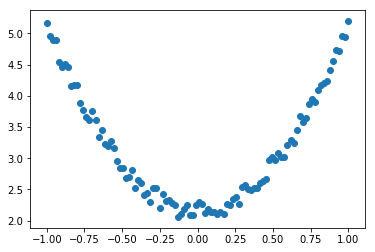

In [10]:
plt.scatter(x,y)
plt.show()

In [11]:
# 随机初始化权重

w1 = np.random.rand(1,1)
b1 = np.random.rand(1,1)
w1,b1

(array([[0.77828922]]), array([[0.7795984]]))

[[2.98497442]] [[2.14688182]]


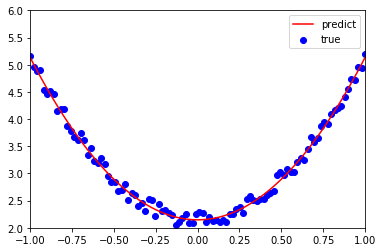

In [12]:
# 训练模型，假设批量大小为0

lr = 0.001
for i in range(800):
    y_pred = np.power(x,2)*w1+b1
    loss = (0.5*(y_pred-y)**2).sum()
    
    grad_w = np.sum((y_pred-y)*np.power(x,2))
    grad_b = np.sum((y_pred-y))
    
    w1 -= lr*grad_w
    b1 -= lr*grad_b
    
plt.plot(x,y_pred,'r-',label='predict')
plt.scatter(x,y,color='blue',marker='o',label='true')
plt.xlim(-1,1)
plt.ylim(2,6)
plt.legend()
plt.show
print(w1,b1)

# 2.7 使用Tensor及Antograd实现机器学习

In [13]:
import torch as t
from matplotlib import pyplot as plt

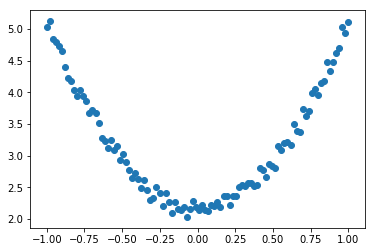

In [20]:
t.manual_seed(100)
dtype = t.float

x = t.unsqueeze(t.linspace(-1,1,100),dim=1)
y = 3*x.pow(2)+2+0.3*t.rand(x.size())

plt.scatter(x.numpy(),y.numpy())
plt.show()

In [21]:
# 初始化参数

w = t.randn(1,1,dtype=dtype,requires_grad=True)
b = t.zeros(1,1,dtype=dtype,requires_grad=True)

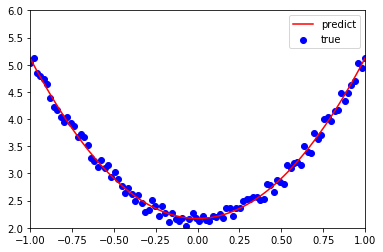

tensor([[2.9480]], requires_grad=True) tensor([[2.1715]], requires_grad=True)


In [22]:
lr = 0.001

for ii in range(800):
    y_pred = x.pow(2).mm(w)+b
    loss = (0.5*(y_pred-y)**2).sum()
    
    loss.backward()
    
    with t.no_grad():
        w -= lr*w.grad
        b -= lr*b.grad
        
        w.grad.zero_()
        b.grad.zero_()

plt.plot(x.numpy(), y_pred.detach().numpy(),'r-',label='predict')#predict
plt.scatter(x.numpy(), y.numpy(),color='blue',marker='o',label='true') # true data
plt.xlim(-1,1)
plt.ylim(2,6)
plt.legend()
plt.show()
print(w, b)